# DSC 680 Project 1: Heart Disease Presence 

# Importing the data and checking the shape

In [48]:
#Importing the needed packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the dataset through pandas dataframe
hdata = pd.read_csv("C:\\Users\\silverfox\\Downloads\\heart_disease_UCI_dataset.csv")

#Checking the shape of the heat disease dataframe
hdata.shape


(303, 14)

# Checking the information of the data

In [49]:
#Checking the information of the dataframe
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Changing the data types and checking the new data types

In [50]:
#Changing the data types for new ones that are sex and target
hdata[['sex', 'target', 'thal', 'cp', 'restecg', 'fbs', 'ca', 'exang', 'slope']] = hdata[['sex', 'target', 'thal', 'cp', 'restecg', 'fbs', 'ca', 'exang', 'slope']].astype('category') 

#Checking the new data types
hdata.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [51]:
#Checking the first rows of the dataframe
hdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Renaming columns and converting values to strings

In [52]:
#Renaming the dataframe's columns
hdata.rename(columns = {'cp': 'chestpain', 'trestbps': 'restingbp', 'fbs': 'fastbloodsug', 'exang': 'angina', 'oldpeak': 'exinduced_depression', 'thalach': 'max_heartrate', 'ca': 'numofmajorvessels'}, inplace = True)

#Converting some values to strings for the sex variable
sex_code = {0: 'Female', 1: 'Male'}
hdata.sex = hdata['sex'].map(sex_code)

#Converting some values to strings for fasting blood pressure variable
fastbloodsug_code = {0: 'Normal', 1: 'High'}
hdata.fastbloodsug = hdata['fastbloodsug'].map(fastbloodsug_code)


# Converting more values to strings 

In [53]:
#Converting some values to strings for restecg variable
restecg_code = {0: 'Normal', 1: 'Very Abnormal'}
hdata.restecg = hdata['restecg'].map(restecg_code)

#Converting some values to strings for execrised induced angina variable
angina_code = {0: 'No', 1: 'Yes'}
hdata.angina = hdata['angina'].map(angina_code)

#Converting some values to strings for target variable
target_code = {0: 'No Disease', 1: 'Disease'}
hdata.target = hdata['target'].map(target_code)

#Converting some values to strings for slope variable
slope_code = {0: 'Upslope', 1: 'Flat', 2: 'Downslope'}
hdata.slope = hdata['slope'].map(slope_code)

#Converting some values to strings for chestpain variable
chestpain_code = {0: 'Asymptomatic', 1: 'Non Anginal', 2: 'Atypical Angina', 3: 'Typical Angina'}
hdata.chestpain = hdata['chestpain'].map(chestpain_code)

# Num check for the recent changes

In [54]:
hdata.isnull().sum()

age                     0
sex                     0
chestpain               0
restingbp               0
chol                    0
fastbloodsug            0
restecg                 4
max_heartrate           0
angina                  0
exinduced_depression    0
slope                   0
numofmajorvessels       0
thal                    0
target                  0
dtype: int64

# Data Visualizations

## Histogram 

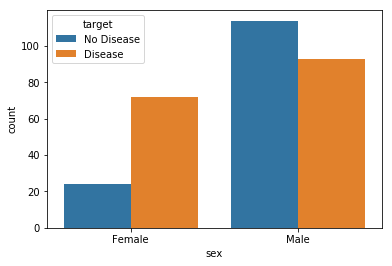

In [55]:
#Making a histogram of the number of observations based on the age variable
sns.countplot(x = 'sex', data = hdata, hue = 'target')
plt.show()


## Box Plot 

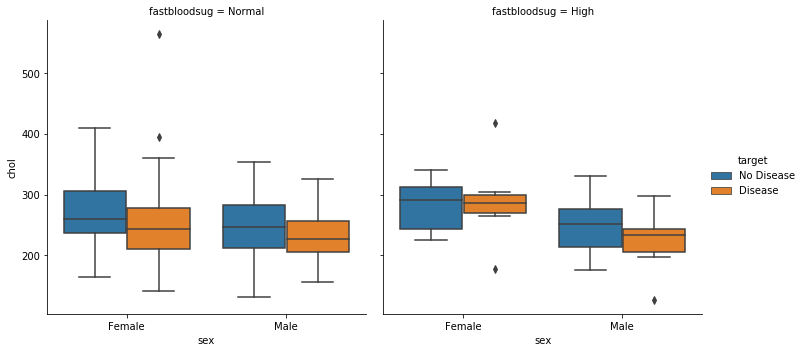

In [56]:
#Making a box plot that shows the cholesterol levels by the target variable and the fasting blood sugar variable
sns.catplot(x = 'sex', y = 'chol', data = hdata, kind = 'box', hue = 'target', col = 'fastbloodsug')
plt.show()

## Violin Plot 

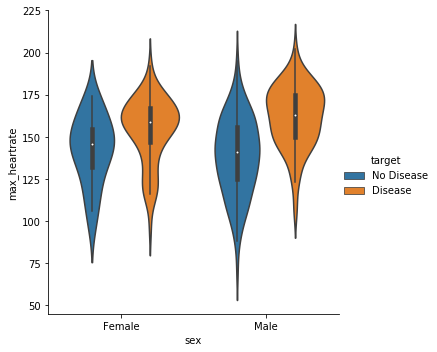

In [57]:
#Making a swarm plot based on the target, max heartrate and sex variables
sns.catplot(x = 'sex', y = 'max_heartrate', data = hdata, kind = 'violin', hue = 'target')
plt.show()

## Swarm Plot 

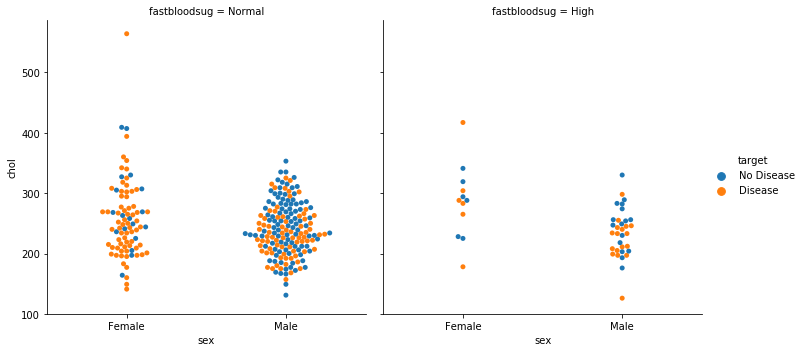

In [58]:
#Making a swarm plot based on the fasting blood sugar, cholesterol levels and sex variables
sns.catplot(x = 'sex', y = 'chol', data = hdata, kind = 'swarm', hue = 'target', col = 'fastbloodsug')
plt.show()

## Histogram of people with and without heart disease 

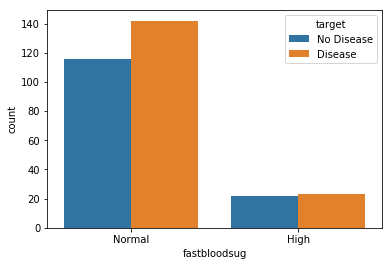

In [59]:
#Making a histogram of people with and without heart disease based on fasting blood sugar variables
sns.countplot(x = 'fastbloodsug', data = hdata, hue = 'target')


## Bar chart of people with and without heart disease based on chestpain

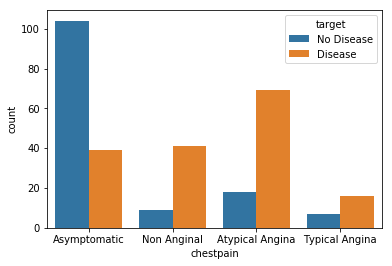

In [60]:
#Making a bar chart that shows people with and without heart disease based on the chestpain variable
sns.countplot(x = 'chestpain', data = hdata, hue = 'target')

## Pair Plot of correlations 

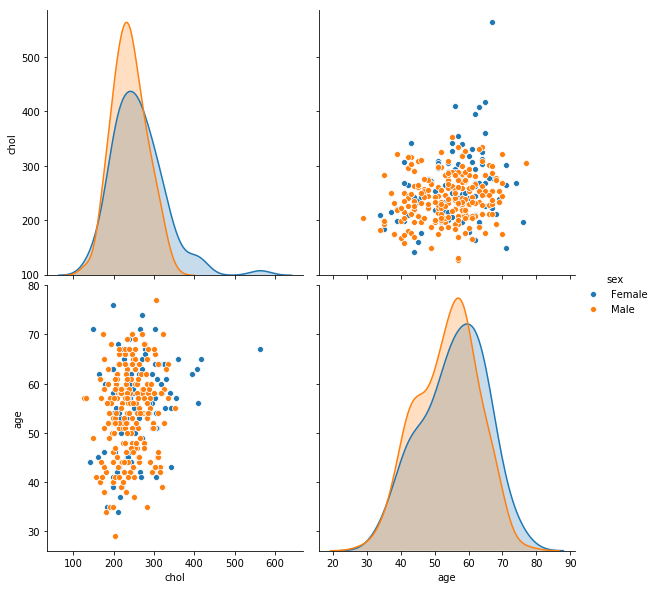

In [61]:
#Making a pair plot that shows a correlation of cholesterol levels and age variables
sns.pairplot(hdata, height = 4, vars = ['chol', 'age'], hue = 'sex')

# Model Fitting

## ADA Boost Classifier 

In [128]:
#Importing the needed packages
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Importing the dataset through pandas dataframe
hdatamodel = pd.read_csv("C:\\Users\\silverfox\\Downloads\\heart_disease_UCI_dataset.csv")

#Changing the data types for new ones that are sex and target
hdatamodel[['sex', 'target', 'thal', 'cp', 'restecg', 'fbs', 'ca', 'exang', 'slope']] = hdatamodel[['sex', 'target', 'thal', 'cp', 'restecg', 'fbs', 'ca', 'exang', 'slope']].astype('category') 

#Allocating the x and y values from the dataframe
X = hdatamodel.iloc[:, :-1]
y = hdatamodel.iloc[:, 13]

In [129]:
#Importing the test and train split package
from sklearn.model_selection import train_test_split

#Making the split of the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [130]:
#Fitting data to the ADA boost classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state = 0)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=0)

In [131]:
#Making the predictions from X_test
y_pred = adaboost.predict(X_test)

#Calculating the score from area under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred)

0.8060344827586207

## Logistic Regression 

In [132]:
#Using the test and training set for logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [133]:
#Making the prediction from X_test
y_predlog = classifier.predict(X_test)

#Calulating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predlog)

cm

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [134]:
#Calculating the score from area under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test, y_predlog)

0.8685344827586206

In [135]:
#Making a classification report on accuracy and F1
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_predlog)

print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Cross Validation on Logistic Regression 

In [136]:
#Accuracies from three fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, n_jobs = -1, cv = 5)

accuracies.mean()

0.8221576928643797

## Grid Search on Logistic Regression 

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

#Logistic Regression creation
classifierlog = LogisticRegression()

#Penalty space for regularizaton
penalty = ['l1', 'l2']

#Hyperparameter space for regularization
C = np.logspace(0, 4, 10)

#Hyperparameter options
hyperparameters = dict(C = C, penalty = penalty)

#Making grid search using five fold cross validation
clf = GridSearchCV(classifierlog, hyperparameters, n_jobs = -1)

#Fitting Grid Search
clf = clf.fit(X_train, y_train)

#Printing the best hyperparameters
print(clf.best_estimator_.get_params()['penalty'])
print(clf.best_estimator_.get_params()['C'])

l2
1.0


In [138]:
#Making the prediction from X-test
y_predgrid = clf.predict(X_test)

#Calculating the score from area under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test, y_predgrid)

0.8685344827586206

In [139]:
#Calculating the comfusion matrix
from sklearn.metrics import confusion_matrix
cmgrid = confusion_matrix(y_test, y_predgrid)

cmgrid

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [140]:
#Making a classification report on accuracy and F1 for GridSearch
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_predgrid)

print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [141]:
#Validating GridSearch Parameters
classifier = LogisticRegression(random_state = 0, penalty = 'l2', C = 1.0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
#Getting prediction from X_test
y_predgrid = classifier.predict(X_test)

#Calculating the score from area under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test, y_predgrid)

0.8685344827586206

## Model Fitting with Random Forest  

In [143]:
#Fitting the random forests classification on the test and training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'gini', n_estimators = 10, random_state = 42, oob_score = True)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [144]:
#Getting the predicitons from X_test
y_predran = classifier.predict(X_test)

#Calculation the area under the curve score
from sklearn import metrics
metrics.roc_auc_score(y_test, y_predran)

0.8545258620689655

In [145]:
#Calculation the out of bag error score from the random forest classifier
classifier.oob_score_

0.7892561983471075

In [146]:
#Using Grid Search with Cross Validation to improve the accuracy
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [1, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
CV_rfc = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [147]:
#Getting the best parameters from random Forest with Gird Search
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 10}

In [148]:
#Getting prediction from Randon Forest with Grid Search
y_predgs = CV_rfc.predict(X_test)

#Calculating the score from area under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test, y_predgs)

0.8825431034482758

In [149]:
#Calculating the comfusion matrix
from sklearn.metrics import confusion_matrix
cmgs = confusion_matrix(y_test, y_predgs)

cmgs

array([[24,  5],
       [ 2, 30]], dtype=int64)

In [150]:
#Making a classification report on accuracy and F1 for Random Forest with GridSearch
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_predgs)

print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [151]:
#Using Random Forest with Grid Search and Cross Validation to imporve accuracy
param_grid = {'n_estimators': [1, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
CV2_rfc = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 5)
CV2_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
#Getting the best parameters from Random Forest with Grid Search
CV2_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 10}

In [153]:
#Getting the prediction from X_test from Random Forest with Grid Search
y_predrf = CV2_rfc.predict(X_test)

#Calculating the score from area under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test, y_predrf)

0.8825431034482758

In [154]:
#Using Random Forest Classifier to classify data for best parameters
classifier = RandomForestClassifier(criterion = 'gini', n_estimators = 10, random_state = 42, max_features = 'auto', max_depth = 4)
classifier.fit(X_train, y_train)

y_predfin = classifier.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_predfin)
print(auc)

0.8825431034482758
